# Import

In [207]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from datetime import timedelta
from sklearn.impute import SimpleImputer

import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.pylab as pylab
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'xx-large',
         'axes.titlesize':'xx-large',
          'axes.titleweight': 'bold',
          'axes.labelweight': 'bold',
         'xtick.labelsize':'xx-large',
          'xtick.major.size': 5.5,
         'ytick.labelsize':'xx-large',
          'ytick.major.size': 5.5,
          'axes.labelpad': 15.0,
          'grid.color': 'gray',
         'axes.edgecolor': 'black'}
pylab.rcParams.update(params)
plt.rcParams["patch.force_edgecolor"] = True

In [2]:
file1 = '/Users/bentaylor/Documents/Springboard/ultimate_challenge/ultimate_data_challenge.json'
file2 = '/Users/bentaylor/Documents/Springboard/ultimate_challenge/logins.json'
df1 = pd.read_json(file1, convert_dates = ['signup_date', 'last_trip_date'],
            dtype = {'city':'category','trips_in_first_30_days':np.int8,'avg_rating_of_driver':np.int8,
                     'avg_surge': np.int8,'phone':'category','surge_pct':np.int8,'weekday_pct':np.float16,
                    'avg_dist':np.int16})
df2 = pd.read_json(file2) # convert_dates = ['login_time']

### This timespan is 101 days.

In [4]:
df2.max() - df2.min()

login_time   101 days 22:45:22
dtype: timedelta64[ns]

In [6]:
df2.isna().sum()

login_time    0
dtype: int64

# Part 1: EDA

In [7]:
df_logins = df2.resample("15min", on="login_time").count()
df_logins.index.name = "date"
df_logins.reset_index(inplace=True)
df_logins.rename({"login_time":"logins"}, axis=1, inplace=True)

df_logins.head(3)

,date,logins
0,1970-01-01 20:00:00,2
1,1970-01-01 20:15:00,6
2,1970-01-01 20:30:00,9


In [8]:
df_logins.insert(1, 'day', df_logins.date.dt.day_name())
df_logins.insert(2, 'hour', df_logins.date.dt.hour)
df_logins.head(3)

,date,day,hour,logins
0,1970-01-01 20:00:00,Thursday,20,2
1,1970-01-01 20:15:00,Thursday,20,6
2,1970-01-01 20:30:00,Thursday,20,9


## Groupby DataFrames

### Days

In [9]:
df_day = df_logins.groupby('day').sum()[['logins']]
df_day['day_avg'] = df_logins.groupby("day").mean()[["logins"]]
df_day.head(3)

,logins,day_avg
day,,
Friday,15208,10.561111
Monday,8823,6.213380
Saturday,19377,13.456250


### Hours

In [10]:
df_hour = df_logins.groupby('hour').sum()[['logins']]
df_hour['hr_avg'] = df_logins.groupby('hour').mean()[['logins']]
df_hour.head(3)

,logins,hr_avg
hour,,
0,5993,14.688725
1,6317,15.482843
2,5800,14.215686


In [11]:
df_counts = df_logins.groupby(['day']).sum()[['logins']]
df_counts['day_avg'] = df_logins.groupby(['day']).mean()[['logins']]
df_counts.head(7)

,logins,day_avg
day,,
Friday,15208,10.561111
Monday,8823,6.213380
Saturday,19377,13.456250
Sunday,18167,12.615972
Thursday,11960,8.794118
Tuesday,9268,6.895833
Wednesday,10339,7.692708


In [12]:
df_total = df_logins.groupby(["hour", "day"]).mean().reset_index()
df_total.head(3)

,hour,day,logins
0,0,Friday,16.25
1,0,Monday,8.85
2,0,Saturday,20.90


## Let's Visualize Login-related Data

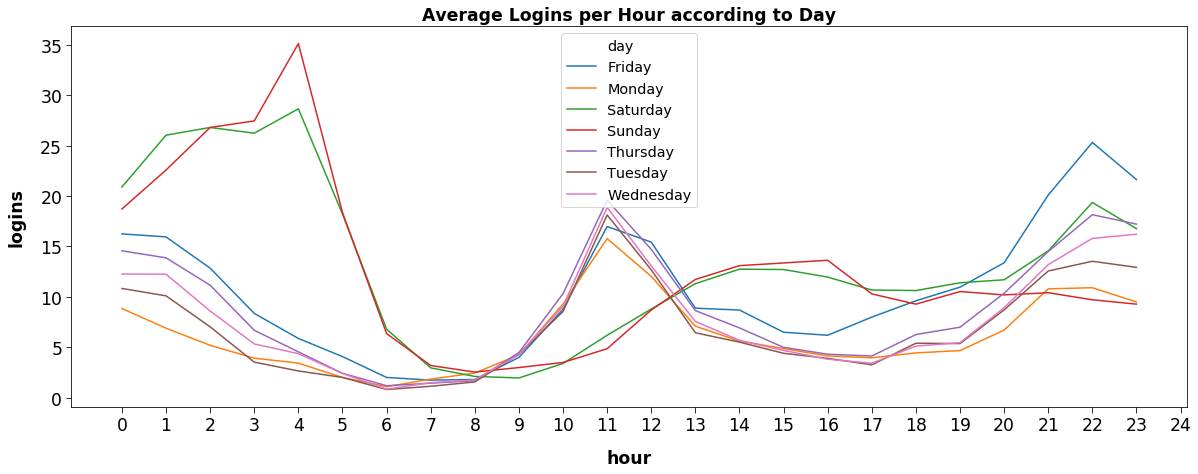

In [13]:
#plotting df
f, axes = plt.subplots(figsize=(20,7))
ax = sns.lineplot(x='hour', y='logins', data=df_total, hue='day')
plt.title('Average Logins per Hour according to Day')
plt.xticks(range(0,25))

#display plot
plt.show()

In [14]:
import pandas_bokeh
pandas_bokeh.output_notebook()

Loading BokehJS ...

### Plotting with pandas plot_bokeh rejects groupbys, so I must download groupbys and reload them.

In [15]:
file = '/Users/bentaylor/Desktop/df_total.csv'
df_total.to_csv(file, index=False)

In [16]:
df4 = pd.read_csv(file)

In [17]:
df4.plot_bokeh.line(x='day', y='logins', figsize=[1000,520], title='Logins for Each Day')

Figure(id='1002', ...)

## Let's graph the raw number of logins, first in one massive Bokeh graph, then in three about-equal parts in three graphs

In [18]:
df_logins.plot_bokeh.line(x='date', y='logins', figsize=[900,520])

Figure(id='1101', ...)

In [19]:
df_logins.shape

(9788, 4)

In [20]:
df_logins[:3000].plot_bokeh.line(x='date', y='logins', figsize=[900,520], ylim=(0,40))

Figure(id='1308', ...)

In [21]:
df_logins[3000:6000].plot_bokeh.line(x='date', y='logins', figsize=[900,520], ylim=(0,40))

Figure(id='1534', ...)

In [22]:
df_logins[:6000:].plot_bokeh.line(x='date', y='logins', figsize=[900,520], ylim=(0,40))

Figure(id='1779', ...)

### Let's graph the average logins according to days and hours.

In [23]:
df_day.to_csv('/Users/bentaylor/Desktop/df_day1.csv')
df_day1 = pd.read_csv('/Users/bentaylor/Desktop/df_day1.csv')

In [27]:
df_day1.plot_bokeh.bar(x='day', y='logins', title='Average Logins according to Day')

Figure(id='2519', ...)

In [25]:
df_hour.to_csv('/Users/bentaylor/Desktop/df_hour1.csv')
df_hour1 = pd.read_csv('/Users/bentaylor/Desktop/df_hour1.csv')

In [28]:
df_hour1.plot_bokeh.bar(x='hour', y='logins', title='Average Logins according to Hours')

Figure(id='2748', ...)

In [34]:
df_day

,idx,daily,month
0,1970-01-01 12:00:00,112,Jan
1,1970-01-02 00:00:00,291,Jan
2,1970-01-02 12:00:00,390,Jan
3,1970-01-03 00:00:00,402,Jan
4,1970-01-03 12:00:00,391,Jan
...,...,...,...
200,1970-04-11 12:00:00,707,Apr
201,1970-04-12 00:00:00,846,Apr
202,1970-04-12 12:00:00,563,Apr
203,1970-04-13 00:00:00,224,Apr


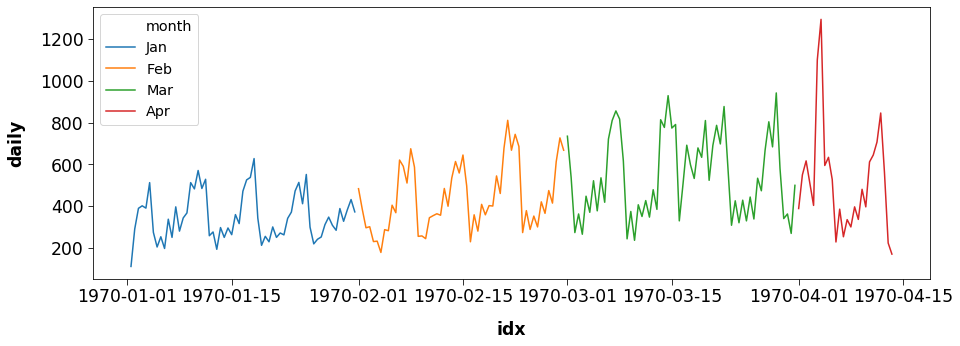

In [47]:
import matplotlib.dates as mdates

#resampling df to daily intervals
df_day = df2.resample("12H", on="login_time").count()

#cleaning up df
df_day.index.name = "idx"
df_day.reset_index(inplace=True)
df_day.rename({"login_time":"daily"}, axis=1, inplace=True)

#extracting months
df_day["month"] = df_day["idx"].dt.month
df_day["month"] = df_day["month"].map({1:"Jan", 2:"Feb", 3:"Mar", 4:"Apr"})

#plotting df
plt.plot(figsize=(20,7))
sns.lineplot(x="idx", y="daily", data=df_day, hue="month", palette="tab10")
ax.legend(loc="upper right", ncol=5)
ax.set(title="Daily Total Logins, YTD", xlabel="Week #")
ax.xaxis.set_major_locator(mdates.DayLocator(interval=7))
ax.set_xticklabels(labels=df_day["idx"].dt.day, \
                   rotation=60, ha="right")

#display plot
plt.show()

In [60]:
df_day

,idx,daily,month
0,1970-01-01 12:00:00,112,Jan
1,1970-01-02 00:00:00,291,Jan
2,1970-01-02 12:00:00,390,Jan
3,1970-01-03 00:00:00,402,Jan
4,1970-01-03 12:00:00,391,Jan
...,...,...,...
200,1970-04-11 12:00:00,707,Apr
201,1970-04-12 00:00:00,846,Apr
202,1970-04-12 12:00:00,563,Apr
203,1970-04-13 00:00:00,224,Apr


# Part 2

## It’s unclear to me whether we’re measuring the “success” of people working in both cities or if we are acquiring more total revenue. These aren’t the same, and could have a negative relationship. Suppose that it takes a half hour to get across the bridge. That’s costly, and there’s always a chance of customers cancelling before employees arrive. What’s more, depending on how many people were waiting in the city one just left, that may not be time well spent just to have good business for a few nighttime hours in Gotham. Let’s decide on a metric for encouraging employees to work in both cities, as total revenue seems more straightforward.
## The primary metric must deal with which city employees drive in. Because we can see each instance of each ride according to every driver, we should record the origin location and final destination (unlike the present data). The difference in changing cities is a reliable indicator of whether employees find it advantageous to be reimbursed for fees. I imagine that variables such as time of driving, login time, and average distance traveled would correlate with any changes, and should be inspected carefully in order to discern any surprising changes. 

## The success of reimbursing for total revenue may not be as simple as contrasting the total revenue before reimbursing with the total revenue minus the reimbursements. We may disrupt features that are harder to detect with data, like supply and demand fluctuations and how comfortable employees feel driving across a long bridge with the Joker. Average wait times, surge pricing, and customer cancellations may change as well. The bottom revenue line is reliable, of course, but it may be hard to decipher why exactly the change will be good or bad for Ultimate.

## A way of teasing out those latent factors may be to have a fraction of the employees to be reimbursed. Perhaps they would be randomly selected or could be those with the highest ratings and most experiences, or who attended Ultimate events. The latter two categories of people may be more invested in taking advantage of their new perks, and that would better ensure they utilize our reimbursement program so that we can see any trend in how often our employees use it (origin and destination) and how that affects the bottom revenue line as well as profit-related variables, like surge pricing.

# Part 3: Predictive Modeling

## EDA and Missing Values

In [149]:
def nan_percentage(df):
    total = df.isnull().sum().sort_values(ascending=False)
    percent = (df.isnull().sum() / df.isnull().count()).sort_values(ascending=False)
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Missing Percent'])
    missing_data['Missing Percent'] = missing_data['Missing Percent'].apply(lambda x: x * 100)
    print(missing_data[missing_data['Total'] > 0].round({'Missing Percent': 3}))
    
nan_percentage(df1)

Empty DataFrame
Columns: [Total, Missing Percent]
Index: []


In [61]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   city                    50000 non-null  object        
 1   trips_in_first_30_days  50000 non-null  int8          
 2   signup_date             50000 non-null  datetime64[ns]
 3   avg_rating_of_driver    41878 non-null  float64       
 4   avg_surge               50000 non-null  int8          
 5   last_trip_date          50000 non-null  datetime64[ns]
 6   phone                   49604 non-null  object        
 7   surge_pct               50000 non-null  int8          
 8   ultimate_black_user     50000 non-null  bool          
 9   weekday_pct             50000 non-null  float16       
 10  avg_dist                50000 non-null  int16         
 11  avg_rating_by_driver    49799 non-null  float64       
dtypes: bool(1), datetime64[ns](2), float16(1), flo

In [63]:
df1.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1,2014-06-17,iPhone,15,True,46.1875,3,5.0
1,Astapor,0,2014-01-29,5.0,1,2014-05-05,Android,0,False,50.0000,8,5.0
2,Astapor,3,2014-01-06,4.3,1,2014-01-07,iPhone,0,False,100.0000,0,5.0
3,King's Landing,9,2014-01-10,4.6,1,2014-06-29,iPhone,20,True,80.0000,2,4.9
4,Winterfell,14,2014-01-27,4.4,1,2014-03-15,Android,11,False,82.3750,3,4.9


### Numeric Data

In [114]:
def letssee(dfandseries, bins=5): # number pandas Series
    print(f'Value Counts: \n{dfandseries.value_counts(bins=bins, normalize=True)} \n\n\
Mean: {dfandseries.mean()} \n\
Median: {dfandseries.median()} \n\
Mode: {dfandseries.mode()}')

In [136]:
letssee(df1.avg_rating_of_driver, bins=8)

Value Counts: 
(4.5, 5.0]      0.56120
(4.0, 4.5]      0.11626
(3.5, 4.0]      0.10824
(2.5, 3.0]      0.02206
(3.0, 3.5]      0.01778
(0.995, 1.5]    0.00520
(1.5, 2.0]      0.00430
(2.0, 2.5]      0.00252
Name: avg_rating_of_driver, dtype: float64 

Mean: 4.6015592912744685 
Median: 4.9 
Mode: 0    5.0
dtype: float64


#### This column is really the only one with a significant number of NaNs missing. The above shows that over 56% of drivers rate customers between 4.5 and 5, and that other bins receive less than 12%. It should be easy to impute the missing data with the mean, as that's a more realistic representation according to the above. Let's impute the data now, then continue.

In [138]:
imr = SimpleImputer(strategy='mean')
imr = imr.fit(df1[['avg_rating_of_driver']])
df1.avg_rating_of_driver = imr.transform(df1[['avg_rating_of_driver']]).ravel()

In [116]:
letssee(df1.avg_rating_by_driver)

Value Counts: 
(4.2, 5.0]      0.91698
(3.4, 4.2]      0.05892
(2.6, 3.4]      0.01322
(0.995, 1.8]    0.00370
(1.8, 2.6]      0.00316
Name: avg_rating_by_driver, dtype: float64 

Mean: 4.778158195947439 
Median: 5.0 
Mode: 0    5.0
dtype: float64


#### This column shows a lot of postiive feelings of our employees toward our customers, thankfully. Just like before, the ratings are high. Let's impute the mean.

In [148]:
imr = SimpleImputer(strategy='mean')
imr = imr.fit(df1[['avg_rating_by_driver']])
df1.avg_rating_by_driver = imr.transform(df1[['avg_rating_by_driver']]).ravel()

In [117]:
letssee(df1.trips_in_first_30_days)

Value Counts: 
(-0.126, 25.0]    0.99626
(25.0, 50.0]      0.00346
(50.0, 75.0]      0.00026
(100.0, 125.0]    0.00002
(75.0, 100.0]     0.00000
Name: trips_in_first_30_days, dtype: float64 

Mean: 2.2782 
Median: 1.0 
Mode: 0    0
dtype: int8


In [118]:
letssee(df1.avg_surge)

Value Counts: 
(0.992, 2.4]    0.99710
(2.4, 3.8]      0.00232
(3.8, 5.2]      0.00056
(6.6, 8.0]      0.00002
(5.2, 6.6]      0.00000
Name: avg_surge, dtype: float64 

Mean: 1.01824 
Median: 1.0 
Mode: 0    1
dtype: int8


In [119]:
letssee(df1.surge_pct)

Value Counts: 
(-0.101, 20.0]    0.86072
(20.0, 40.0]      0.07448
(40.0, 60.0]      0.03194
(80.0, 100.0]     0.02842
(60.0, 80.0]      0.00444
Name: surge_pct, dtype: float64 

Mean: 8.76064 
Median: 0.0 
Mode: 0    0
dtype: int8


In [120]:
df1.surge_pct.value_counts(normalize=True)[:7]

0      0.68866
100    0.02832
50     0.02734
33     0.02308
25     0.01854
20     0.01712
16     0.01560
Name: surge_pct, dtype: float64

In [122]:
letssee(df1.weekday_pct)

Value Counts: 
(80.0, 100.0]     0.38822
(-0.101, 20.0]    0.20180
(40.0, 60.0]      0.16564
(60.0, 80.0]      0.15966
(20.0, 40.0]      0.08468
Name: weekday_pct, dtype: float64 

Mean: inf 
Median: 66.6875 
Mode: 0    100.0
dtype: float16


In [123]:
letssee(df1.avg_dist)

Value Counts: 
(-0.161, 32.0]    0.99468
(32.0, 64.0]      0.00512
(64.0, 96.0]      0.00016
(128.0, 160.0]    0.00004
(96.0, 128.0]     0.00000
Name: avg_dist, dtype: float64 

Mean: 5.30462 
Median: 3.0 
Mode: 0    2
dtype: int16


### Categorical and Boolean Data

In [121]:
df1.phone.value_counts(normalize=True)

iPhone     0.697162
Android    0.302838
Name: phone, dtype: float64

#### With less than 1 percent missing for this column and one dominating the other, let's impute the most frequent.

In [145]:
imr = SimpleImputer(missing_values=None,strategy='most_frequent')
imr = imr.fit(df1[['phone']])
df1.phone = imr.transform(df1[['phone']]).ravel()

#### Black Users

In [126]:
df1.ultimate_black_user.value_counts(normalize=True)

False    0.62292
True     0.37708
Name: ultimate_black_user, dtype: float64

#### City

In [127]:
df1.query('ultimate_black_user == True', engine='python').city.value_counts(normalize=True)

Winterfell        0.433383
Astapor           0.343535
King's Landing    0.223083
Name: city, dtype: float64

In [128]:
df1.city.value_counts(normalize=True)

Winterfell        0.46672
Astapor           0.33068
King's Landing    0.20260
Name: city, dtype: float64

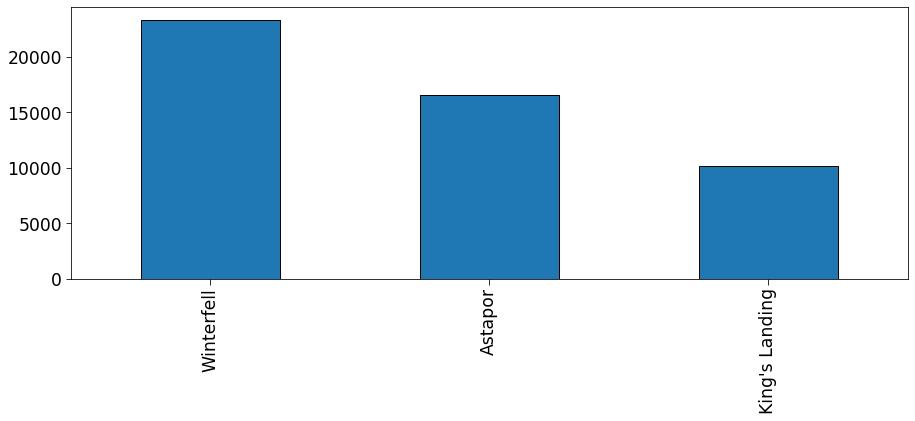

In [132]:
df1.city.value_counts().plot.bar()

# Predictive Modeling of User Retention

## The metric is last_trip_date, and this is a classification problem: how many users will be active within the last thirty days six months from April 13, 1970.

## Prepare Data

In [161]:
df1.dtypes

city                              object
trips_in_first_30_days              int8
signup_date               datetime64[ns]
avg_rating_of_driver             float64
avg_surge                           int8
last_trip_date            datetime64[ns]
phone                             object
surge_pct                           int8
ultimate_black_user                 bool
weekday_pct                      float16
avg_dist                           int16
avg_rating_by_driver             float64
dtype: object

In [163]:
active = lambda row: 1 if row != 0 else 0
df1.insert(3, 'active', df1['trips_in_first_30_days'].apply(active))
df1.head()

,city,trips_in_first_30_days,signup_date,active,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,1,4.7,1,2014-06-17,iPhone,15,True,46.1875,3,5.0
1,Astapor,0,2014-01-29,0,5.0,1,2014-05-05,Android,0,False,50.0000,8,5.0
2,Astapor,3,2014-01-06,1,4.3,1,2014-01-07,iPhone,0,False,100.0000,0,5.0
3,King's Landing,9,2014-01-10,1,4.6,1,2014-06-29,iPhone,20,True,80.0000,2,4.9
4,Winterfell,14,2014-01-27,1,4.4,1,2014-03-15,Android,11,False,82.3750,3,4.9


In [158]:
# Create arrays for features and target variable
y = df1['last_trip_date'].copy().values
X = df1.copy().drop('last_trip_date', axis=1)
X_col = X.copy().columns

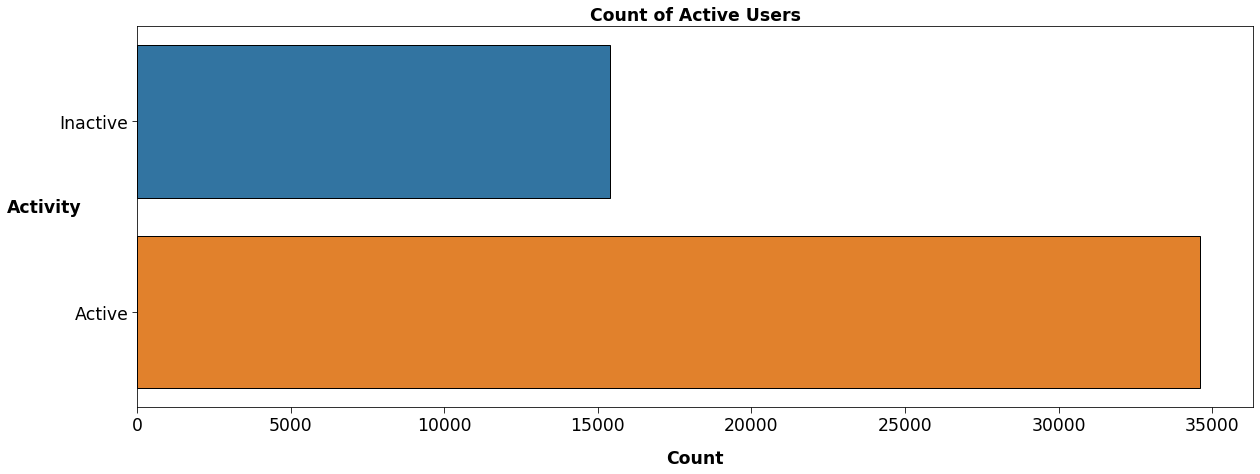

In [197]:
_ = plt.subplots(figsize=(20,7))
_ = sns.countplot(y=df1["active"], order=[0,1])
_ = plt.title('Count of Active Users')
_ = plt.yticks([0, 1], ['Inactive', 'Active'], rotation=0), plt.ylabel('Activity',rotation=0)
_ = plt.xlabel('Count')

0    0.3078
1    0.6922
Name: active, dtype: float64

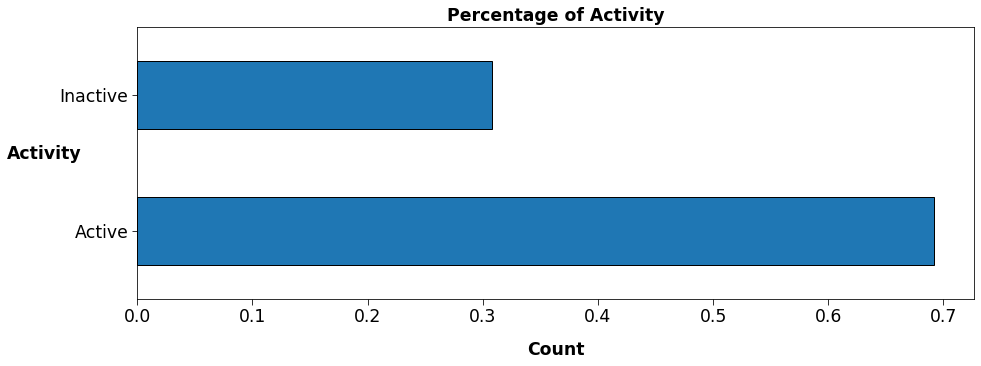

In [229]:
df1.active.value_counts(normalize=True).plot.barh()
_ = plt.title('Percentage of Activity')
_ = plt.yticks([0, 1], ['Active', 'Inactive'], rotation=0), plt.ylabel('Activity',rotation=0)
_ = plt.xlabel('Count')
df1.active.value_counts(normalize=True, ascending=True)

In [ ]:
sixth_mon_active = lambda row: 1 if \
                      row["last_trip_date"] - row["signup_date"] \
                      > timedelta(days=30*5) \
                      else 0
df1.insert(4, 'six_mon_active', df1.apply(sixth_mon_active, axis=1))
df1.six_mon_active.value_counts(normalize=True)

In [214]:
df1.six_mon_active.value_counts(normalize=True)

0    0.75604
1    0.24396
Name: six_mon_active, dtype: float64

In [227]:
df1["ultimate_black_user"] = df1["ultimate_black_user"].map({False:0, True:1}).astype("category")
df1["active"] = df1["active"].astype("category")
df1.six_mon_active = df1.six_mon_active.astype('category')
df1.city = df1.city.astype('category')
df1.phone = df1.phone.astype('category')
df1.avg_rating_of_driver = df1.avg_rating_of_driver.astype('int8')
df1.avg_rating_by_driver = df1.avg_rating_by_driver.astype('int8')

In [228]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   city                    50000 non-null  category      
 1   trips_in_first_30_days  50000 non-null  int8          
 2   signup_date             50000 non-null  datetime64[ns]
 3   active                  50000 non-null  category      
 4   six_mon_active          50000 non-null  category      
 5   avg_rating_of_driver    50000 non-null  int8          
 6   avg_surge               50000 non-null  int8          
 7   last_trip_date          50000 non-null  datetime64[ns]
 8   phone                   50000 non-null  category      
 9   surge_pct               50000 non-null  int8          
 10  ultimate_black_user     50000 non-null  category      
 11  weekday_pct             50000 non-null  float16       
 12  avg_dist                50000 non-null  int16 

## Slice up data

In [246]:
y = df1['six_mon_active'].copy().values
X = df1.copy().drop(['six_mon_active'], axis=1)
X_col = X.copy().columns

In [278]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

#pipeline for numeric features
numeric_features = ["avg_dist", "avg_rating_by_driver", "avg_rating_of_driver", \
                    "avg_surge", "surge_pct", "trips_in_first_30_days", "weekday_pct"]
numeric_transformer = [("scaler", StandardScaler())]
numeric_transformer = Pipeline(numeric_transformer)

#pipeline for categorical features
categorical_features = ["city", "phone", "ultimate_black_user", "active"]
categorical_transformer = [("encoder", OneHotEncoder())]
categorical_transformer = Pipeline(categorical_transformer)

#divernce of the pipelines
preprocessor = ColumnTransformer(
    transformers=[("num", numeric_transformer, numeric_features), \
                  ("cat", categorical_transformer, categorical_features)])

#incorporating the random forest estimator
pipeline = Pipeline(steps=[("pre", preprocessor), \
                           ("rf", RandomForestClassifier(random_state = 42))])

#grid search parameters
params = {"rf__n_estimators" : [75, 100, 150],
          "rf__max_depth" : [5, 10, 15]}

#fitting the pipeline to the grid search
cv1 = GridSearchCV(pipeline, param_grid=params, cv=3)
cv1.fit(X_train, y_train)

print(cv1)

KeyboardInterrupt: 

In [276]:
print(f"Best parameters: {cv1.best_params_}")
print(f"Training accuracy score from tuned model: {cv1.best_score_*100:.1f}%")

Best parameters: {'rf__max_depth': 10, 'rf__n_estimators': 75}
Training accuracy score from tuned model: 79.6%


### Our test shows the best parameters and a score of almost 79.6%. Let's explore feature importance.

In [272]:
pipeline.fit(X_train, y_train)

fe1 = pipeline.named_steps['rf'].feature_importances_

print(fe1)

[0.20248777 0.06898482 0.05611391 0.00279454 0.15657683 0.11351777
 0.28074392 0.01440401 0.02685259 0.01022716 0.0165092  0.01378808
 0.01300516 0.01185361 0.00600365 0.00613699]


In [251]:
#replicating numeric_transformer of our pipeline
num_cols = df1[numeric_features].columns
num_cols = num_cols.tolist()

#replicating categorical_transformer of our pipeline
cat_cols = pd.get_dummies(df1[categorical_features]).columns
cat_cols = cat_cols.tolist()

#the column names are added together
cols = num_cols + cat_cols

#the column names are finally tied to our fe list
feature_importance = zip(cols, fe)
feature_importance = sorted(feature_importance, key=lambda x:x[1], reverse=True)

for i, j in feature_importance:
    print(f"Weight: {j:.3f} | Feature: {i}")

Weight: 0.281 | Feature: weekday_pct
Weight: 0.202 | Feature: avg_dist
Weight: 0.157 | Feature: surge_pct
Weight: 0.114 | Feature: trips_in_first_30_days
Weight: 0.069 | Feature: avg_rating_by_driver
Weight: 0.056 | Feature: avg_rating_of_driver
Weight: 0.027 | Feature: city_King's Landing
Weight: 0.017 | Feature: phone_Android
Weight: 0.014 | Feature: city_Astapor
Weight: 0.014 | Feature: phone_iPhone
Weight: 0.013 | Feature: ultimate_black_user_0
Weight: 0.012 | Feature: ultimate_black_user_1
Weight: 0.010 | Feature: city_Winterfell
Weight: 0.006 | Feature: active_1
Weight: 0.006 | Feature: active_0
Weight: 0.003 | Feature: avg_surge


In [273]:
from sklearn.ensemble import AdaBoostClassifier

numeric_features = ["avg_dist", "avg_rating_by_driver", "avg_rating_of_driver", \
                    "avg_surge", "surge_pct", "trips_in_first_30_days", "weekday_pct"]
numeric_transformer = [("scaler", StandardScaler())]
numeric_transformer = Pipeline(numeric_transformer)

#pipeline for categorical features
categorical_features = ["city", "phone", "ultimate_black_user", "active"]
categorical_transformer = [("encoder", OneHotEncoder())]
categorical_transformer = Pipeline(categorical_transformer)

#divernce of the pipelines
preprocessor = ColumnTransformer(
    transformers=[("num", numeric_transformer, numeric_features), \
                  ("cat", categorical_transformer, categorical_features)])

#incorporating the random forest estimator
pipeline = Pipeline(steps=[("pre", preprocessor), \
                           ("ab", AdaBoostClassifier(random_state = 42))])

#grid search parameters
params = {"ab__n_estimators" : [75, 100, 150],
          "ab__learning_rate" : [.25, .5, .75, 1]}

#fitting the pipeline to the grid search
cv2 = GridSearchCV(pipeline, param_grid=params, cv=3)
cv2.fit(X_train, y_train)

print(cv2)

GridSearchCV(cv=3, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('pre',
                                        ColumnTransformer(n_jobs=None,
                                                          remainder='drop',
                                                          sparse_threshold=0.3,
                                                          transformer_weights=None,
                                                          transformers=[('num',
                                                                         Pipeline(memory=None,
                                                                                  steps=[('scaler',
                                                                                          StandardScaler(copy=True,
                                                                                                         with_mean=True,
                                                 

In [277]:
from sklearn import metrics

y_pred = cv2.predict(X_test)

test_accuracy = metrics.accuracy_score(y_test, y_pred)
test_f1_score = metrics.f1_score(y_test, y_pred)

print(f"Model accuracy: {test_accuracy*100:.2f}%")
print(f"Model F1 Score: {test_f1_score:.2f}")

Model accuracy: 79.53%
Model F1 Score: 0.49


### AdaBoost has similar accuracy, but with different weights for features, a theme perhaps being that no feature is weighted as much as RF.

In [274]:
#ada
pipeline.fit(X_train, y_train)

fe2 = pipeline.named_steps['ab'].feature_importances_

print(fe2)

[0.16 0.14 0.04 0.   0.16 0.1  0.2  0.02 0.04 0.02 0.02 0.02 0.04 0.
 0.04 0.  ]


In [275]:
#replicating numeric_transformer of our pipeline
num_cols = df1[numeric_features].columns
num_cols = num_cols.tolist()

#replicating categorical_transformer of our pipeline
cat_cols = pd.get_dummies(df1[categorical_features]).columns
cat_cols = cat_cols.tolist()

#the column names are added together
cols = num_cols + cat_cols

#the column names are finally tied to our fe list
feature_importance = zip(cols, fe2)
feature_importance = sorted(feature_importance, key=lambda x:x[1], reverse=True)

for i, j in feature_importance:
    print(f"Weight: {j:.3f} | Feature: {i}")

Weight: 0.200 | Feature: weekday_pct
Weight: 0.160 | Feature: avg_dist
Weight: 0.160 | Feature: surge_pct
Weight: 0.140 | Feature: avg_rating_by_driver
Weight: 0.100 | Feature: trips_in_first_30_days
Weight: 0.040 | Feature: avg_rating_of_driver
Weight: 0.040 | Feature: city_King's Landing
Weight: 0.040 | Feature: ultimate_black_user_0
Weight: 0.040 | Feature: active_0
Weight: 0.020 | Feature: city_Astapor
Weight: 0.020 | Feature: city_Winterfell
Weight: 0.020 | Feature: phone_Android
Weight: 0.020 | Feature: phone_iPhone
Weight: 0.000 | Feature: avg_surge
Weight: 0.000 | Feature: ultimate_black_user_1
Weight: 0.000 | Feature: active_1
